In [ ]:
!pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.1 MB/s eta 0:00:00


In [ ]:
!pip install -q youtube_transcript_api

In [ ]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi

In [ ]:
youtube_video = "https://www.youtube.com/watch?v=mAQCC_AYPa8"

In [ ]:
video_id = youtube_video.split("=")[1]

In [ ]:
video_id

'mAQCC_AYPa8'

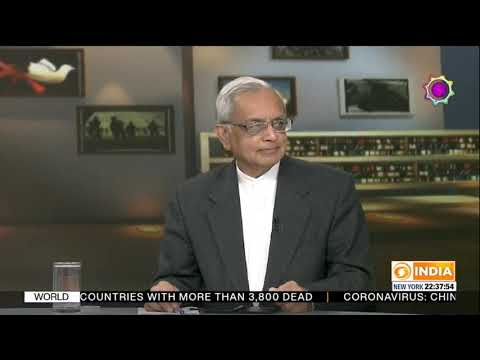

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [ ]:
YouTubeTranscriptApi.get_transcript(video_id)
transcript = YouTubeTranscriptApi.get_transcript(video_id)

In [ ]:
transcript[0:5]

[{'text': '[Music]', 'start': 2.05, 'duration': 6.829},
 {'text': "hello I'm Rudra not Sanyal welcome to",
  'start': 9.86,
  'duration': 5.319},
 {'text': 'war and peace your go-to program on',
  'start': 13.23,
  'duration': 4.59},
 {'text': 'security matters and geopolitics once',
  'start': 15.179,
  'duration': 5.01},
 {'text': 'again we thank all our viewers who keep',
  'start': 17.82,
  'duration': 4.949}]

In [ ]:
result = ""
for i in transcript:
    result += ' ' + i['text']
#print(result)
print(len(result))

23122


In [ ]:
summarizer = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
num_iters = int(len(result)/1000)
summarized_text = []
for i in range(0, num_iters + 1):
  start = 0
  start = i * 1000
  end = (i + 1) * 1000
  print("input text \n" + result[start:end])
  out = summarizer(result[start:end])
  out = out[0]
  out = out['summary_text']
  print("Summarized text\n"+out)
  summarized_text.append(out)

#print(summarized_text)

input text 
 [Music] hello I'm Rudra not Sanyal welcome to war and peace your go-to program on security matters and geopolitics once again we thank all our viewers who keep in touch with us from different parts of the country and abroad well viewers in recent weeks you must have noticed that the world has started to take notice of the rise of India both as a military power and for India's rapid economic growth in fact some of the nation states have started calling India or developed nations already so in this edition of war and peace we will examine why so many important nation states are keen on strengthening their ties with India so a lead topic for you in this edition of war and peace is India and the world [Music] and on popular demand from our file short segment we will once again bring you a vignette on an epitome of communal harmony our guests for you in this edition of war and peace are ambassador Vaska Balakrishnan former senior diplomat and vice admiral Anoop Singh former com

Your max_length is set to 142, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


Summarized text
 Portugal aims to give a foothold to companies and looking to expand further into euro . Abdul Vakeel only the second Muslim to come to Portugal in 1956 is a well respected person of Indian origin and Portugal who was conferred with a privacy party as a man by India . Portugal has worked with him to organize inter-religious dialogue in Portugal .
input text 
ence Marcelo was there we had 17 or 18 religions lined up each one right reading a sentence of it there regional political
Summarized text
 Marcelo was there we had 17 or 18 religions lined up each one right reading a sentence of it there . Marcelo said: "We had 17 religion lined up in the room" Marcelo says: "There were 17 religions on the floor." Marcelo: "It was a very special moment for Marcelo to be there"


In [ ]:
len(str(summarized_text))

7984

In [ ]:
str(summarized_text)

'[" The world has started to take notice of the rise of India both as a military power and for India\'s rapid economic growth . Some of the nation states have started calling India or developed nations already so in this edition of war and peace we will examine why so many important nation states are keen on strengthening their ties with India .", \' Admiral India is being viewed as an important economic and military power since when do you think this started to happen? Vice-admiral says it happened a long time ago even during the cold war era and the Western powers were a little worried they they thought at that time that we were part of the Warsaw Pact or an ally of the Soviet Union .\', \' India was looked at by the entire world as a very powerful emerging nation but the real power and the real surge in strategic potential of India was witnessed in the mid 90s onwards . The real search started taking place in the early part of the millennium from the year 2000 onwards when economica